# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [11]:
#NB: Only numpy arrays can be the input of neural networks in KERAS

dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values  #we need OPEN column

### Feature Scaling

In [12]:
#NB: Use normalisation for RNNs with activation function of the Output layer
# a Sigmoid function

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [13]:
#iv) Creating a data structure with 60 timestamps and 1 output(moving average)
#X_train contains the 60 previous stock pricing before the next financial day
#y_train ccontains the stock price of the next financial day

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train) #convert lists to numpy array

### Reshaping

In [14]:
#Using Reshape and KERAS Input shape formatting

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [15]:
from keras.models import Sequential #initialisation
from keras.layers import Dense #output layer
from keras.layers import LSTM #LSTM layers
from keras.layers import Dropout #Dropout regularisation (overfitting)

### Initialising the RNN

In [16]:
#NB: we are doing regression here
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [17]:
# adding the first LSTM layer with Dropout (avoid overfitting)
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))#timestep and indicator from 1v
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [18]:
# DON'T specify input_shape
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [19]:
# DON'T specify input_shape
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [20]:
# Return_sequence is False
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [21]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [22]:
#RMSprop (advanced SGD) is used for compiling RNNs but 'adam' also works
#Check out RNN compilers in Keras
#Use mse for regression
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [23]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 121ms/step - loss: 0.0574
Epoch 2/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0058
Epoch 6/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0047
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [24]:
#test data
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [25]:
# Get total dataset by concatenating the original dataframes (train and test)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
#next is to get the INPUTS at each time of Jan '17
#lower boundary=1st financial day of Jan '17 - 60
#upper boundary=last stock price of dataset_total = 60
#NB: 1st financial day of Jan '17 = 3rd Jan
# ==> len(dataset_total)-len(dataset_test)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#reshape inputs to column vectors
inputs = inputs.reshape(-1,1)
#scale inputs
inputs = sc.transform(inputs)
#creating moving average again for total
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#3D reshape plus indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#predicting Jan '17 stock price
predicted_stock_price = regressor.predict(X_test) 
#inverse scaling of predictions
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

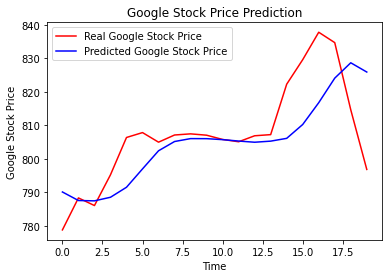

In [26]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Improve RNN
### Getting more training data, increasing the timesteps,adding more indicators,adding more LSTM layers, adding more neurons